Data downloaded and read into a dataframe!


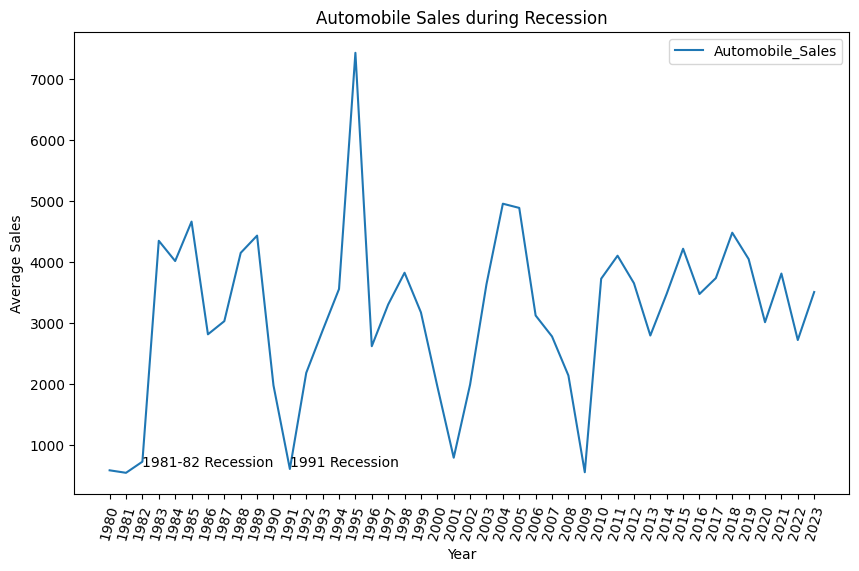

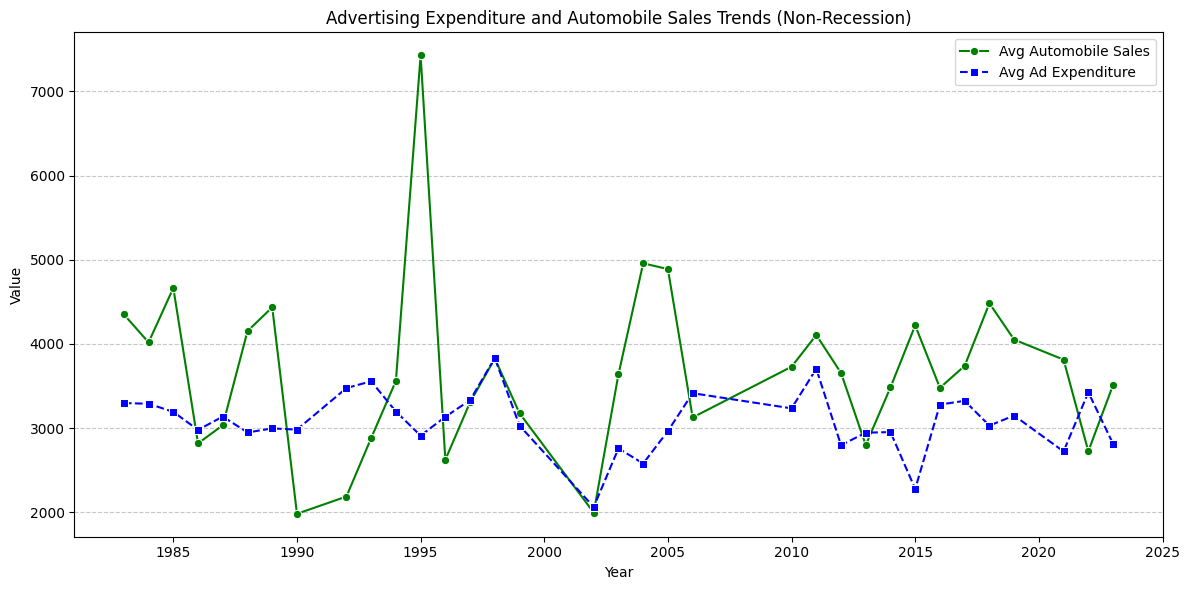

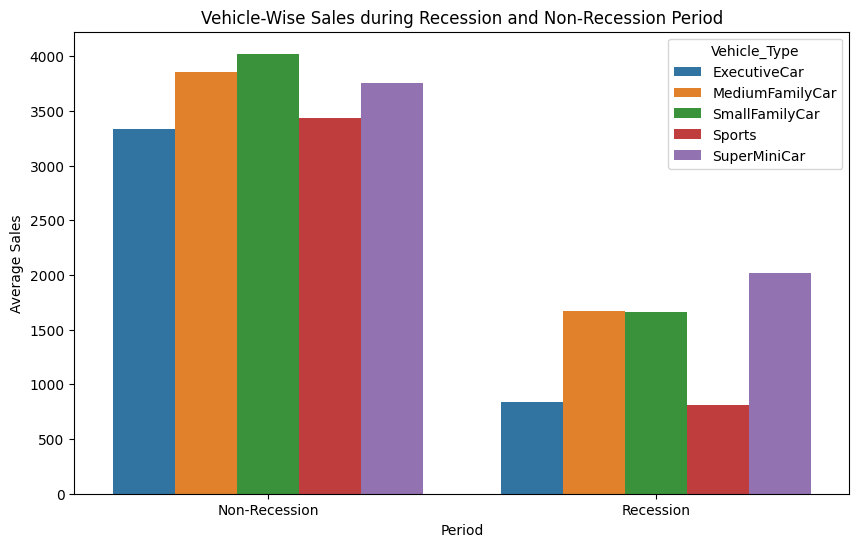

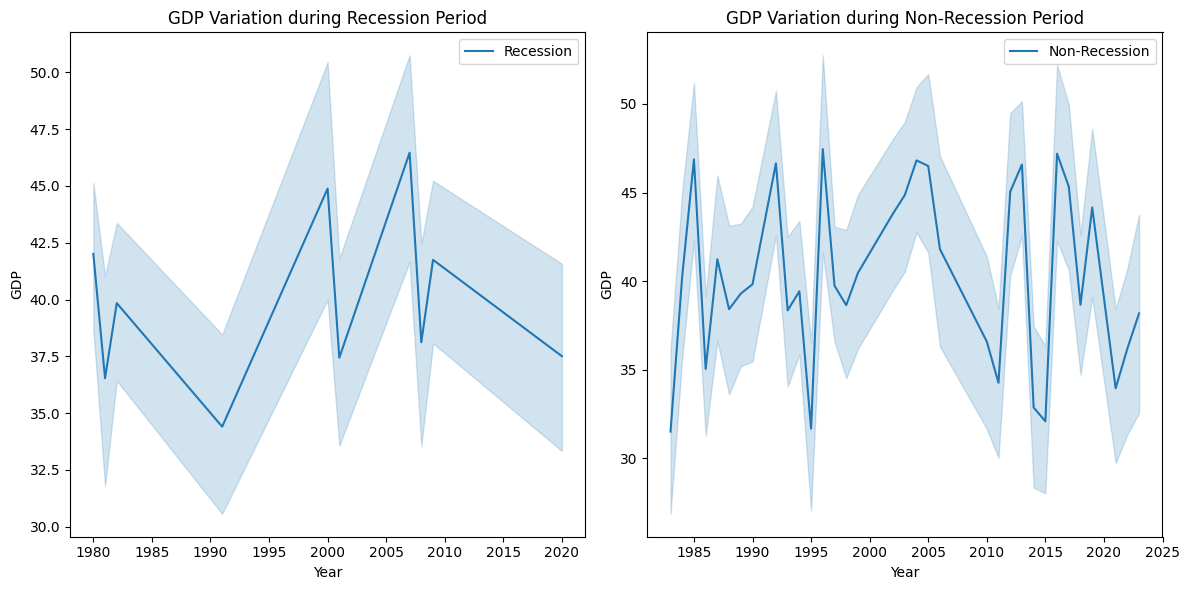

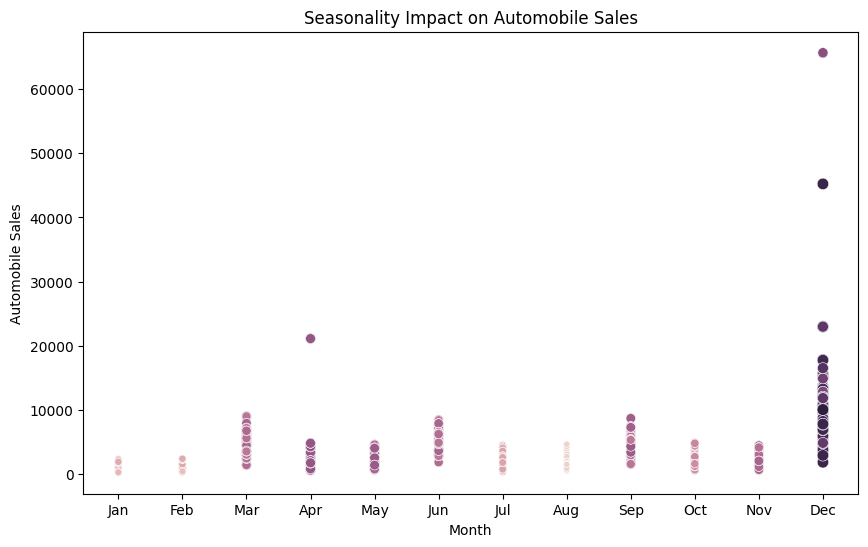

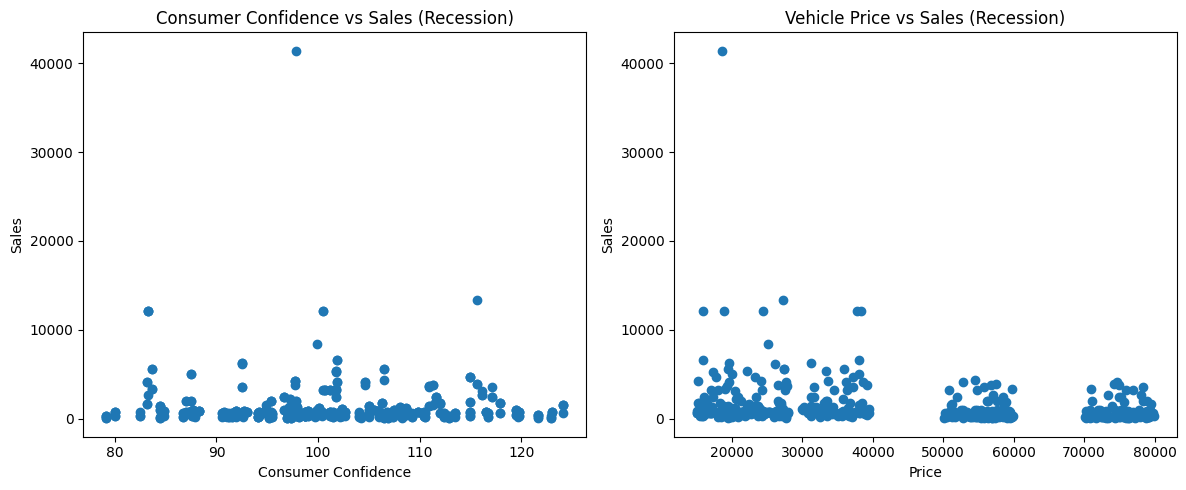

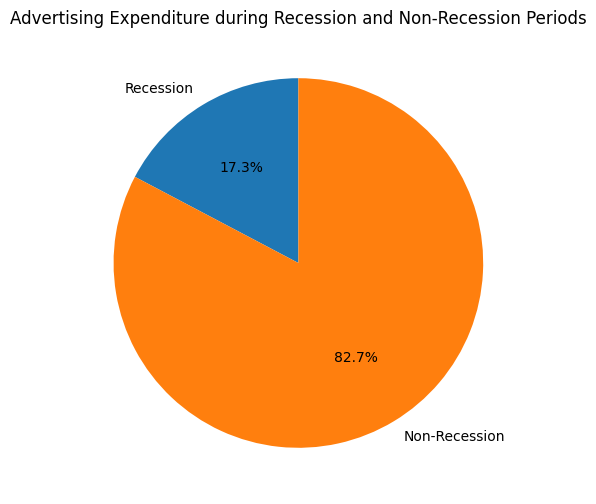

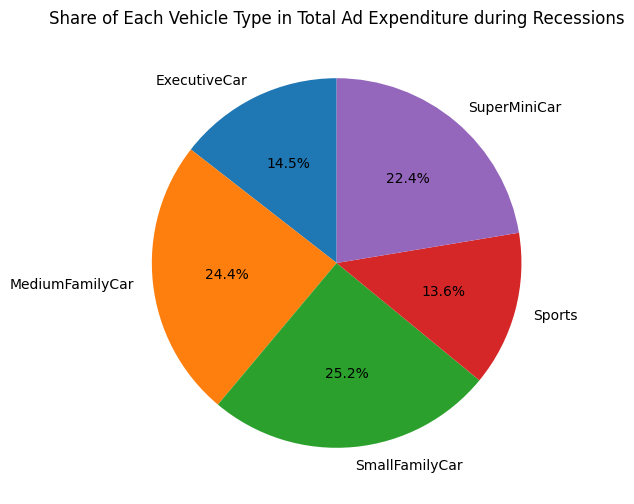

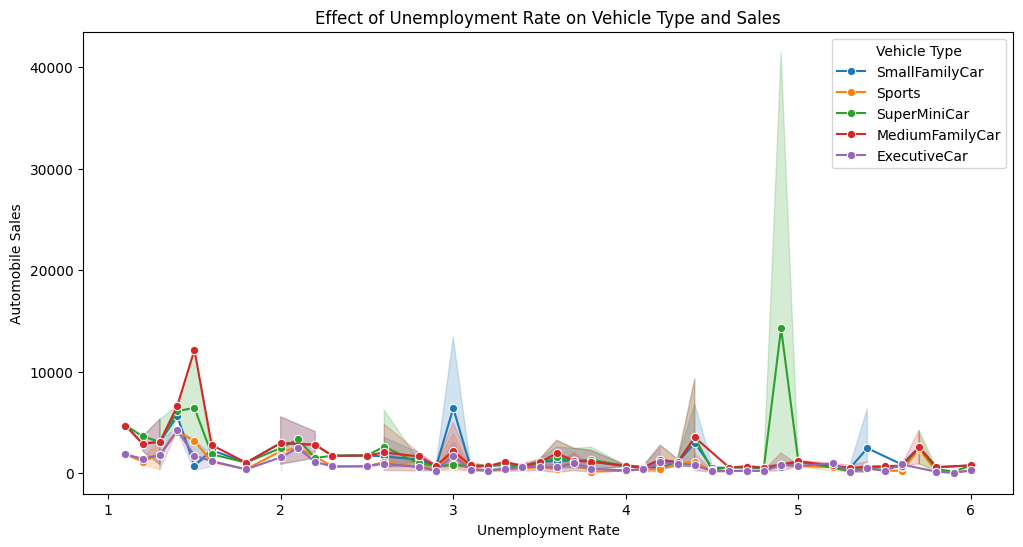

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import io

# --- DATA IMPORT ---
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/d51iMGfp_t0QpO30Lym-dw/automobile-sales.csv"
response = requests.get(URL)
response.raise_for_status()
csv_content = io.StringIO(response.text)
df = pd.read_csv(csv_content)
print('Data downloaded and read into a dataframe!')

# --- TASK 1.1: Yearly Average Automobile Sales Line Chart ---
plt.figure(figsize=(10, 6))
df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1991, 650, '1991 Recession')
plt.legend()
plt.show()

# --- TASK 1.2: Advertising Expenditure vs Sales (Non-Recession) ---
df_non_rec = df[df['Recession'] == 0]
df_trends = df_non_rec.groupby('Year', as_index=False).agg(
    Avg_Sales=('Automobile_Sales', 'mean'),
    Avg_Ad_Spend=('Advertising_Expenditure', 'mean')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trends, x='Year', y='Avg_Sales', marker='o', color='green', label='Avg Automobile Sales')
sns.lineplot(data=df_trends, x='Year', y='Avg_Ad_Spend', marker='s', linestyle='--', color='blue', label='Avg Ad Expenditure')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Advertising Expenditure and Automobile Sales Trends (Non-Recession)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- TASK 1.3: Sales Comparison by Vehicle Type ---
plt.figure(figsize=(10, 6))
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

# --- TASK 1.4: GDP Variation Subplots ---
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig = plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

# --- TASK 1.5: Seasonality Bubble Plot (Non-Recession) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size='Seasonality_Weight', hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.show()

# --- TASK 1.6: Consumer Confidence and Price vs Sales during Recession ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Sales')
plt.title('Consumer Confidence vs Sales (Recession)')

plt.subplot(1, 2, 2)
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Vehicle Price vs Sales (Recession)')
plt.tight_layout()
plt.show()

# --- TASK 1.7: Total Ad Expenditure Pie Chart ---
plt.figure(figsize=(8, 6))
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRAtotal = non_rec_data['Advertising_Expenditure'].sum()
plt.pie([RAtotal, NRAtotal], labels=['Recession', 'Non-Recession'], autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

# --- TASK 1.8: Ad Expenditure by Vehicle Type (Recession) ---
plt.figure(figsize=(8, 6))
VTexpenditure = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.pie(VTexpenditure.values, labels=VTexpenditure.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Ad Expenditure during Recessions')
plt.show()

# --- TASK 1.9: Unemployment Rate Impact (CORRECTED) ---
plt.figure(figsize=(12, 6))
# Using lowercase 'unemployment_rate' to match the dataset schema
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.show()